# Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Sourcing and Loading Data

In [2]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

In [3]:
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [4]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


## Cleaning and Transforming

Transpose the dataframe, reset index, and change column headings to the first row.

In [5]:
properties_T = properties.T
properties_T = properties_T.reset_index()
properties_T.columns = properties_T.iloc[0]
properties_T = properties_T.drop(0)
properties_T.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,918209,882872,786627,827659,798499,836807,782057,803126,771641,675309
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,293816,300526,304556,304924,301702,304852,305056,310569,316477,323954
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,526033,518175,523280,529660,533619,530354,531932,532705,540601,531887
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,339353,340893,344091,346680,345061,345405,348681,354052,358906,363412
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,482808,484160,482303,497729,519562,522239,513892,497018,514179,502264


Rename a few columns.

In [6]:
properties_T = properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})
properties_T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,918209,882872,786627,827659,798499,836807,782057,803126,771641,675309
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,293816,300526,304556,304924,301702,304852,305056,310569,316477,323954
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,526033,518175,523280,529660,533619,530354,531932,532705,540601,531887
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,339353,340893,344091,346680,345061,345405,348681,354052,358906,363412
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,482808,484160,482303,497729,519562,522239,513892,497018,514179,502264


Melt dataframe.

In [7]:
clean_properties = pd.melt(properties_T, id_vars= ['London_Borough', 'ID'])
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [8]:
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])
clean_properties.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


Assert that there are proper names for all the boroughs, and get rid of any null values.

In [9]:
clean_properties[clean_properties['ID'].isna()]
NaNFreeDF = clean_properties.dropna()
NaNFreeDF.head()
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']
NaNFreeDF[NaNFreeDF.London_Borough.isin(nonBoroughs)]
NaNFreeDF = NaNFreeDF[~NaNFreeDF.London_Borough.isin(nonBoroughs)]
df = NaNFreeDF
df.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


## Visualization

Subset a few boroughs, and plot the month against average price.

Text(0.5, 1.0, 'Camden Historical Housing Price')

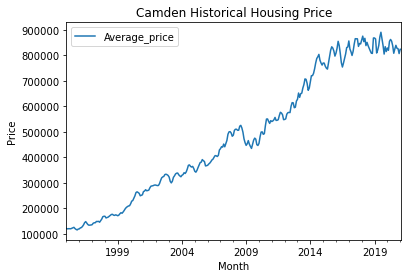

In [11]:
camden_prices = df[df['London_Borough']=='Camden']
ax = camden_prices.plot(kind='line', x='Month', y='Average_price')
ax.set_ylabel('Price')
ax.set_title('Camden Historical Housing Price')

Text(0.5, 1.0, 'Bexley Historical Housing Price')

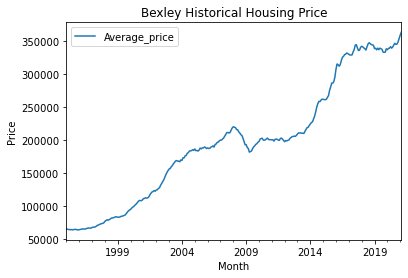

In [12]:
bexley_prices = df[df['London_Borough']=='Bexley']
ax = bexley_prices.plot(kind ='line', x='Month', y='Average_price')
ax.set_ylabel('Price')
ax.set_title('Bexley Historical Housing Price')

Text(0.5, 1.0, 'Westminster Historical Housing Price')

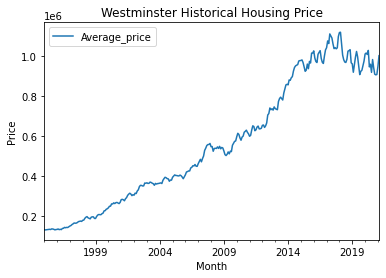

In [13]:
westminster_prices = df[df['London_Borough'] == 'Westminster']
ax = westminster_prices.plot(kind ='line', x='Month', y='Average_price')
ax.set_ylabel('Price')
ax.set_title('Westminster Historical Housing Price')

Just looking at a few of the boroughs, it is clear that the general trend tends upwards, and somewhat flattens around 2017. Nonetheless, housing price is historically on the rise. It is now a matter of finding which borough had the highest increase.

In [14]:
df['Year'] = df['Month'].apply(lambda t: t.year)
dfg = df.groupby(by=['London_Borough', 'Year']).mean()
dfg.sample(10)

,,Average_price
London_Borough,Year,
Tower Hamlets,2004,219986.892633
Croydon,1997,77674.269967
Brent,2016,489469.418367
Sutton,1995,70291.304638
Westminster,2015,964643.071792
Croydon,2020,375208.581058
Bromley,2019,436486.159142
Brent,2011,298964.549867
Haringey,2010,314479.843742


In [15]:
dfg = dfg.reset_index()
dfg.head()

,London_Borough,Year,Average_price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


## Modeling

Create a function that will calculate the ratio of house prices, comparing the price of a house in 2018 to the price in 1998. This function will:

1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
3. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
4. Return the ratio.

In [16]:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y2018/y1998]
    return ratio
final = {}
for b in dfg['London_Borough'].unique():
    borough = dfg[dfg['London_Borough'] == b]
    final[b] = create_price_ratio(borough)
print(final) 

{'Barking & Dagenham': [4.89661861291754], 'Barnet': [4.358195917538044], 'Bexley': [4.248977046127877], 'Brent': [4.8945544971392865], 'Bromley': [4.0947846853338765], 'Camden': [4.935353408884261], 'City of London': [5.301620377587609], 'Croydon': [4.201100280024767], 'Ealing': [4.311450902121834], 'Enfield': [4.26347158349581], 'Greenwich': [4.763036347329193], 'Hackney': [6.198285561008662], 'Hammersmith & Fulham': [4.137798101936229], 'Haringey': [5.134624964136042], 'Harrow': [4.0591964329643195], 'Havering': [4.325230371335308], 'Hillingdon': [4.2002730803844575], 'Hounslow': [3.976409106143329], 'Islington': [4.844048012802298], 'Kensington & Chelsea': [5.082465066092464], 'Kingston upon Thames': [4.270549521484271], 'Lambeth': [4.957751163514063], 'Lewisham': [5.449221041059685], 'Merton': [4.741273313294604], 'Newham': [5.305390437201879], 'Redbridge': [4.471182006097364], 'Richmond upon Thames': [4.005161895721457], 'Southwark': [5.516485302379376], 'Sutton': [4.118522608573

In [17]:
df_ratios = pd.DataFrame(final)
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)
df_ratios.head()

,Borough,2018
0,Barking & Dagenham,4.896619
1,Barnet,4.358196
2,Bexley,4.248977
3,Brent,4.894554
4,Bromley,4.094785


Text(0.5, 1.0, 'Top 15 Highest Housing Price Increases')

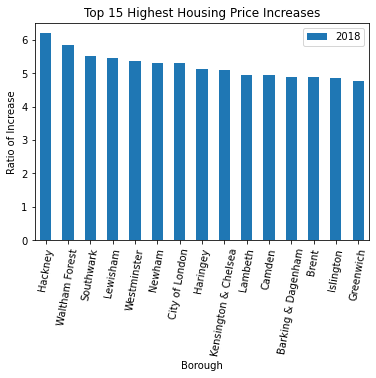

In [24]:
top15 = df_ratios.sort_values(by='2018',ascending=False).head(15)
ax = top15[['Borough','2018']].plot(kind='bar')
ax.set_xlabel('Borough')
ax.set_xticklabels(top15.Borough, rotation=80)
ax.set_ylabel('Ratio of Increase')
ax.set_title('Top 15 Highest Housing Price Increases')

Text(0.5, 1.0, 'Top 15 Lowest Housing Price Increases')

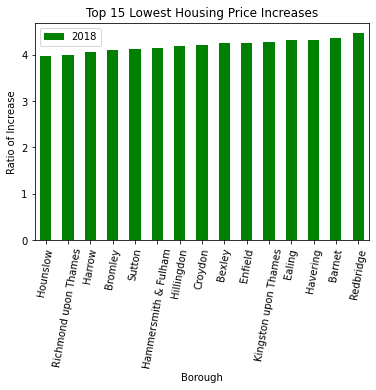

In [28]:
bottom15 = df_ratios.sort_values(by='2018',ascending=True).head(15)
ax = bottom15[['Borough','2018']].plot(kind='bar', color='g')
ax.set_xlabel('Borough')
ax.set_xticklabels(bottom15.Borough, rotation=80)
ax.set_ylabel('Ratio of Increase')
ax.set_title('Top 15 Lowest Housing Price Increases')

## Conclusion

Although quite messy in raw form, the initial data tells a story about the economic status in the 32 London boroughs. For most, it becomes quite clear when looking at the three simple line graphs found above. This shows just three boroughs, chosen at random, and their increase in housing price over a 20 year span. The Camden borough's average price increased over £800,000, yet it is ranked as the 11th highest price increase by ratio. Looking at the top 15 increases above, this gives insight into which boroughs have had the most socioeconomic success in the past 20 years. For housing price to increase, the district must be highly desireable to live in, and for it to be highly desireable to live in, there must be great oppurtunities available. The second bar graph is of great use to those looking to minimize their living costs down the road, for the prices are only going to continue climbing. By using the bottom 15, you can determine which boroughs will result in the lowest increase in housing cost as the years progress.